In [6]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [10]:
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 

df_dogecoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Dogecoin.csv")


In [8]:
df_dogecoin['Date']= pd.to_datetime(df_dogecoin['Date'])
#df_dogecoin.set_index('Date', inplace=True)

In [9]:
df_dogecoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [11]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_dogecoin['Date'] = pd.to_datetime(df_dogecoin['Date'])

df_merged = pd.merge(df_bitcoin, df_dogecoin, on='Date', suffixes=('_btc', '_doge'))
btc_precio = df_merged['High_btc']
doge_precio = df_merged['High_doge']

corr, _ = pearsonr(btc_precio, doge_precio)
print(f"Coeficiente  entre BTC y DOGE: {corr}")

Coeficiente  entre BTC y DOGE: 0.6486123501564895


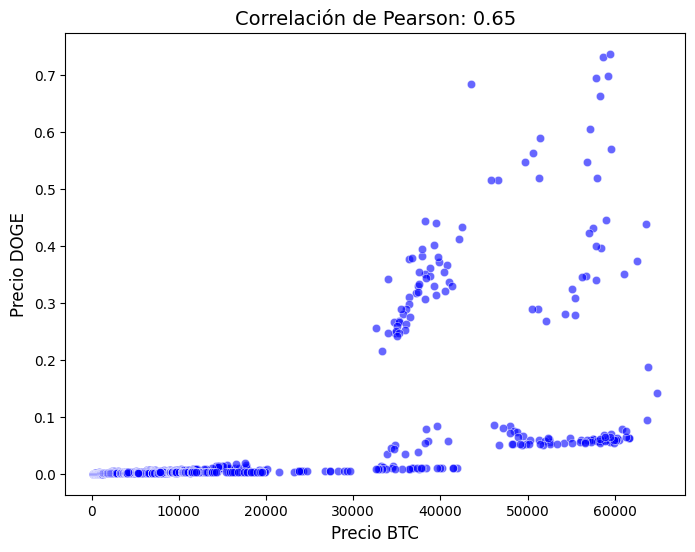

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=doge_precio, color='blue', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio DOGE', fontsize=12)
plt.show()

### CALCULO DEL TIEMPO ENTRE BTC Y ETH 

In [13]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_dogecoin['Date'] = pd.to_datetime(df_dogecoin['Date'])
df_merged = pd.merge(df_bitcoin, df_dogecoin, on='Date', suffixes=('_btc', '_doge'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['doge_change'] = df_merged['Close_doge'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
doge_up_dates = df_merged[df_merged['doge_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_doge_date = doge_up_dates.iloc[(doge_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_doge_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'DOGE Date': nearest_doge_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

                BTC Date           DOGE Date  Tiempo de diferencia (dias)
0    2013-12-19 23:59:59 2013-12-19 23:59:59                            0
1    2013-12-22 23:59:59 2013-12-23 23:59:59                            1
2    2013-12-23 23:59:59 2013-12-23 23:59:59                            0
3    2013-12-25 23:59:59 2013-12-24 23:59:59                            1
4    2013-12-26 23:59:59 2013-12-26 23:59:59                            0
...                  ...                 ...                          ...
1473 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
1474 2021-07-02 23:59:59 2021-07-02 23:59:59                            0
1475 2021-07-03 23:59:59 2021-07-03 23:59:59                            0
1476 2021-07-04 23:59:59 2021-07-04 23:59:59                            0
1477 2021-07-06 23:59:59 2021-07-06 23:59:59                            0

[1478 rows x 3 columns]
